In [4]:
# LOADING NECESSARY LIBRARIES

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style('whitegrid')
import datetime  as dt
import time  
import pdpipe as pdp #allowing a linear series of data transforms to be linked together, resulting in a measurable modeling process
from typing import Tuple, List, Dict 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import glob 
import plotly.graph_objects as go 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline
import category_encoders as ce

%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')



from sklearn.model_selection import GridSearchCV
from plotly import tools

import plotly.offline as pyoff #not sure wat this does 
import plotly.graph_objs as go #this tooo lol 

from plotly.offline import init_notebook_mode, iplot

import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
read_file = pd.read_excel ("new.xlsx")

**convert xml to csv file for data preparation**

In [16]:
read_file.to_csv ("new.csv", 
                  index = None,
                  header=True)

In [17]:
data = pd.DataFrame(pd.read_csv("new.csv"))

data

,student_ID,Questions,score,Course_outcome,Method_used,Attempt_count,Difficulty_level,pass_mark
0,2425844,Q1,67.0,1,child,2,medium,above-55
1,2425844,Q2,67.0,1,child,1,medium,below-55
2,2425844,Q3,100.0,1,parent,1,hard,above-55
3,2425844,Q4,100.0,1,parent,1,hard,above-55
4,2425844,Q5,100.0,1,parent,1,hard,above-55
...,...,...,...,...,...,...,...,...
77,2242332,Q1,100.0,1,parent,1,hard,above-55
78,2242332,Q2,0.0,0,explanation,2,easy,below-55
79,2242332,Q3,57.0,1,none,2,easy,above-55
80,2242332,Q4,100.0,1,parent,1,hard,above-55


In [18]:
data.tail()

,student_ID,Questions,score,Course_outcome,Method_used,Attempt_count,Difficulty_level,pass_mark
77,2242332,Q1,100.0,1,parent,1,hard,above-55
78,2242332,Q2,0.0,0,explanation,2,easy,below-55
79,2242332,Q3,57.0,1,none,2,easy,above-55
80,2242332,Q4,100.0,1,parent,1,hard,above-55
81,2242332,Q5,100.0,1,parent,1,hard,above-55


In [19]:
#check missing data
data.isnull().sum()

student_ID          0
Questions           0
score               0
Course_outcome      0
Method_used         0
Attempt_count       0
Difficulty_level    0
pass_mark           0
dtype: int64

**DEALING WITH CATEGORIAL FEATURES**

EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'Percentage score')

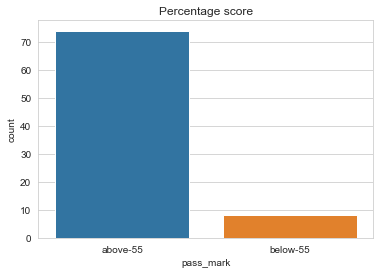

In [20]:
sns.countplot(x='pass_mark', data=data).set_title('Percentage score')

Text(0.5, 1.0, 'Counts of Attempts')

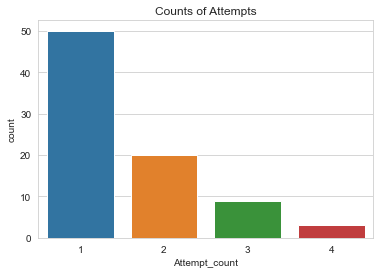

In [26]:
sns.countplot(x='Attempt_count', data=data).set_title('Counts of Attempts')

percentage parent            0.573171
solution          0.182927
child             0.048780
lecture           0.036585
video             0.036585
explanation       0.036585
grand child       0.024390
none              0.024390
textbook&video    0.012195
textbook          0.012195
textbook          0.012195
Name: Method_used, dtype: float64


<AxesSubplot:>

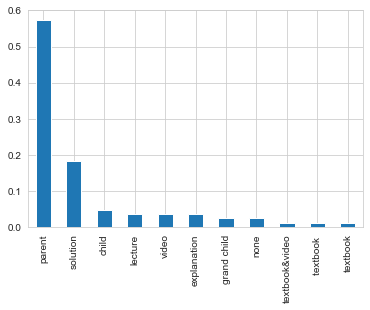

In [25]:
print('percentage',data.Method_used.value_counts(normalize=True))
data.Method_used.value_counts(normalize=True).plot(kind='bar')

Text(0.5, 1.0, 'Which questions are students passing')

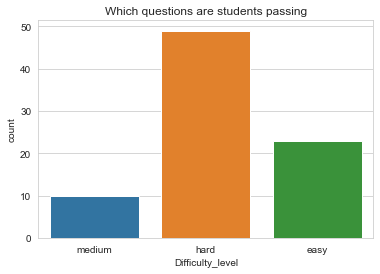

In [27]:
sns.countplot(x='Difficulty_level', data=data).set_title('Which questions are students passing')

<AxesSubplot:xlabel='pass_mark', ylabel='count'>

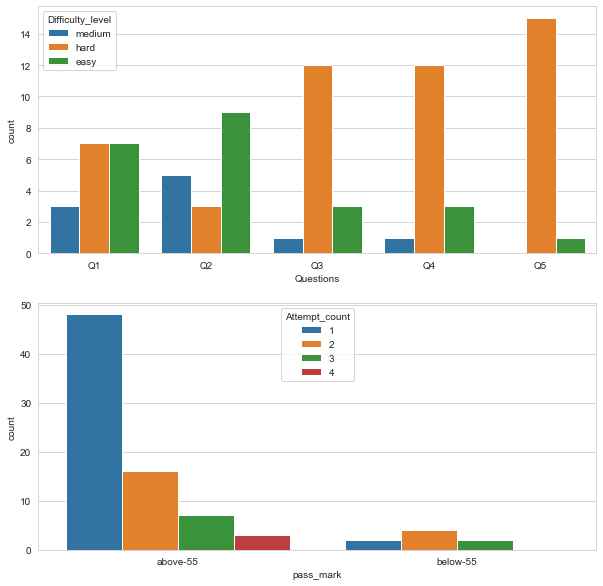

In [30]:

fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Questions', hue='Difficulty_level', data=data, ax=axis1)
sns.countplot(x='pass_mark', hue='Attempt_count', data=data, ax=axis2)

**Attempt count vs question**

<AxesSubplot:xlabel='Questions', ylabel='count'>

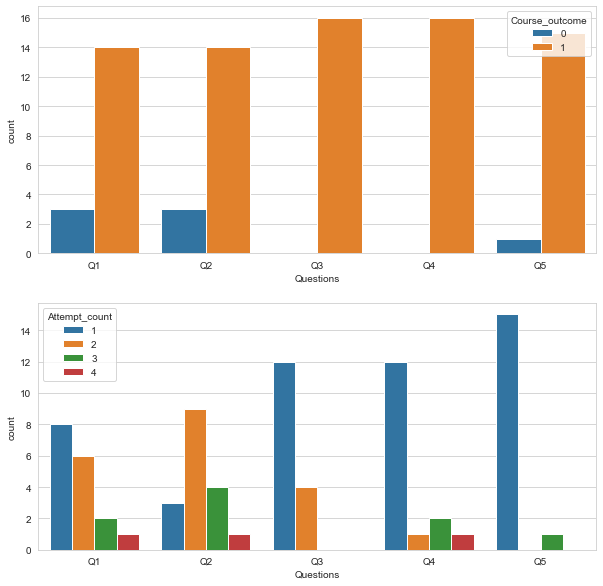

In [31]:

fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Questions', hue='Course_outcome', data=data, ax=axis1)
sns.countplot(x='Questions', hue='Attempt_count', data=data, ax=axis2)